# Computational Intelligence
## Assignment - 1
written by : Jameel Ahmed Syed
email : j.syed@innopolis.university

## Note: This notebook contains the report aswell


# Task-2
<hr>

Given a system of equations

$$
\left\{\begin{array}{l}
3 x+y+z=0 \\
6 x+2 y+2 z=0 \\
-9 x-3 y-3 z=0
\end{array}\right.
$$

we define its space of solutions as $V$.

### Task 2.1

Find a basis in $V$. Visualize $V$ as a plane.

#### Solution 2.1

First we represent the equations in the matrix form like follows:

$$\begin{equation}
\begin{bmatrix}
3 & 1 & 1 \\
6 & 2 & 2 \\
-9 & -3 & -3 \\
\end{bmatrix}
.
\begin{bmatrix}
x \\
y \\
z \\
\end{bmatrix}
=
\begin{bmatrix}
0 \\
0 \\
0 \\
\end{bmatrix}
\end{equation}$$


To Find the basis of $\mathbf{V}$ we need to find its Reduced Row Echelon Form (RREF),
The RREF form is a follows:

$$\begin{equation}
\mathbf{V} =
\begin{bmatrix}
3 & 1 & 1 \\
6 & 2 & 2 \\
-9 & -3 & -3 \\
\end{bmatrix}
\longrightarrow
\begin{bmatrix}
3 & 1 & 1 \\
0 & 0 & 0 \\
0 & 0 & 0 \\
\end{bmatrix}
\longrightarrow
\begin{bmatrix}
1 & \frac{1}{3} & \frac{1}{3} \\
0 & 0 & 0 \\
0 & 0 & 0 \\
\end{bmatrix}
\end{equation}$$

The RREF of $\mathbf{V}$ has one pivot column: the first column. Therefore, the basis of $\mathbf{V}$ is the set containing only the first column of $\mathbf{V}$:



$$\begin{equation}
Basis \hspace{5} of \hspace{5} \mathbf{V} =
\begin{bmatrix}
3 \\
6 \\
-9 \\
\end{bmatrix}
\end{equation}$$

This column is linearly independent and spans the column space of $\mathbf{V}$. Therefore, it forms the basis of $\mathbf{V}$.



To draw the plane:
It is in the form $A\mathbf{x}=\mathbf{0}$ which means that the one of the point on the plane is at the origin $(0, 0, 0)$ also the basis of the left null space is the vector normal to out plane.





In [1]:
from scipy.linalg import null_space, orth
import numpy as np
from sympy import Matrix, pprint

V = np.array([[3,1,1], [6,2,2],[-9,-3,-3]])

V_m = Matrix(V)
print('Basis of null space:')
pprint(V_m.nullspace())
print('Basis of column space:')
pprint(V_m.columnspace())
print('Basis of row space:')
pprint(V_m.T.columnspace())
print('Basis of left null space:')
pprint(V_m.T.nullspace())


Basis of null space:
⎡⎡-1/3⎤  ⎡-1/3⎤⎤
⎢⎢    ⎥  ⎢    ⎥⎥
⎢⎢ 1  ⎥, ⎢ 0  ⎥⎥
⎢⎢    ⎥  ⎢    ⎥⎥
⎣⎣ 0  ⎦  ⎣ 1  ⎦⎦
Basis of column space:
⎡⎡3 ⎤⎤
⎢⎢  ⎥⎥
⎢⎢6 ⎥⎥
⎢⎢  ⎥⎥
⎣⎣-9⎦⎦
Basis of row space:
⎡⎡3⎤⎤
⎢⎢ ⎥⎥
⎢⎢1⎥⎥
⎢⎢ ⎥⎥
⎣⎣1⎦⎦
Basis of left null space:
⎡⎡-2⎤  ⎡3⎤⎤
⎢⎢  ⎥  ⎢ ⎥⎥
⎢⎢1 ⎥, ⎢0⎥⎥
⎢⎢  ⎥  ⎢ ⎥⎥
⎣⎣0 ⎦  ⎣1⎦⎦


One of the normal Vector of the plane is :  [[3.]
 [0.]
 [1.]]


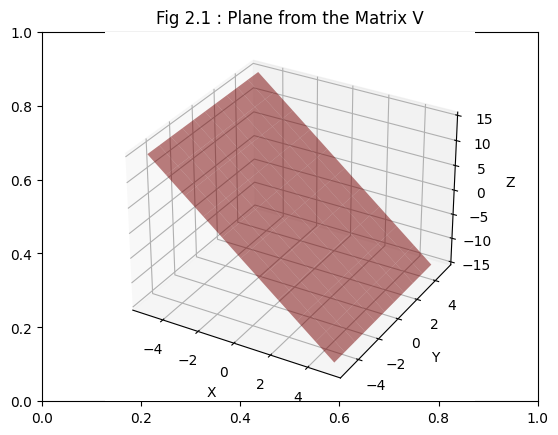

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the matrix V
V = np.array([[3, 1, 1], [6, 2, 2], [-9, -3, -3]])

# Get the normal vector to the plane by computing the left null space basis of V
normal_vector = V_m.T.nullspace()
normal_vector = np.array(normal_vector).astype(np.float64)
print("One of the normal Vector of the plane is : ", normal_vector[1])
normal_vector = normal_vector[1].reshape(-1)

# Since its in the form Ax=0 it means it passes through origin
# Define a point on the plane as the origin (0, 0, 0)
point_on_plane = [0, 0, 0]

# Define a meshgrid of x and y values
xx, yy = np.meshgrid(range(-5, 6), range(-5, 6))

# Solve for the z values of the plane using the plane equation: Ax + By + Cz = D
# We know that the normal vector is [A, B, C]
# We can solve for D using the point on the plane: D = -(A*x + B*y + C*z) = -dot(normal_vector, point_on_plane)
D = -np.dot(normal_vector, point_on_plane)
zz = (-normal_vector[0]*xx - normal_vector[1]*yy - D)/normal_vector[2]

# Create a 3D plot and add the plane to it
fig = plt.figure()
plt.title('Fig 2.1 : Plane from the Matrix V')
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, zz, alpha=0.5, color='red')

# Set the axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show the plot
plt.show()


<hr>

#### Task 2.2

Given an arbitrary vector $\mathbf{g}$, write a procedure of how to find its orthogonal projection onto $V$, and onto the orthogonal compliment of $V$. Prove that the procedure you propose is correct. Show the projection results for $\mathrm{g}=\left[\begin{array}{c}-1 \\ -1 \\ 3\end{array}\right]$. Visualize the projection.

### Solution 2.2


The orthogonal projection of $\mathbf{g}$ onto $\mathbf{A}$ can be found using the formula:

$$\mathbf{P}_{\mathbf{A}} \mathbf{g} = \mathbf{A} (\mathbf{A}^T \mathbf{A})^{-1} \mathbf{A}^T \mathbf{g}$$

The orthogonal projection of $\mathbf{g}$ onto the orthogonal complement of $\mathbf{A}$ can be found using the formula:

$$\mathbf{P}{\mathbf{A}^\perp} \mathbf{g} = \mathbf{g} - \mathbf{P}{\mathbf{A}} \mathbf{g}$$

To find the projection results for $\mathbf{g} = [-1, -1, 3]$, we first need to compute the inverse of $$\mathbf{A}^T \mathbf{A}$$.

We have:
$$\begin{bmatrix}
3 & 6 & -9 \\
1 & 2 & -3 \\
1 & 2 & -3 \\
\end{bmatrix}
.
\begin{bmatrix}
3 & 1 & 1 \\
6 & 2 & 2 \\
-9 & -3 & -3 \\
\end{bmatrix} =
\begin{bmatrix}
126 & 42 & 42 \\
42 & 14 & 14 \\
42 & 14 & 14 \\
\end{bmatrix}$$
The inverse of $\mathbf{A}^T \mathbf{A}$ is:
$$(\mathbf{A}^T \mathbf{A})^{-1} =$$
$$\begin{bmatrix}
\frac{1}{126} & -\frac{1}{63} & -\frac{1}{63} \\
-\frac{1}{63} & \frac{2}{63} & \frac{2}{63} \\
-\frac{1}{63} & \frac{2}{63} & \frac{2}{63} \\
\end{bmatrix}$$
Using these matrices, we can find the orthogonal projection of $\mathbf{g}$ onto $\mathbf{A}$:
$$\mathbf{P}_{\mathbf{A}} \mathbf{g} = \begin{bmatrix}
3 & 1 & 1 \\
6 & 2 & 2 \\
-9 & -3 & -3 \\
\end{bmatrix} \begin{bmatrix}
\frac{1}{126} & -\frac{1}{63} & -\frac{1}{63} \\
-\frac{1}{63} & \frac{2}{63} & \frac{2}{63} \\
-\frac{1}{63} & \frac{2}{63} & \frac{2}{63} \\
\end{bmatrix} \begin{bmatrix}
-1 \\
-1 \\
3 \\
\end{bmatrix} = \begin{bmatrix}
\frac{1}{7} \\
\frac{2}{7} \\
-\frac{3}{7} \\
\end{bmatrix}$$
To find the orthogonal projection of $\mathbf{g}$ onto the orthogonal complement of $\mathbf{A}$, we simply subtract $\mathbf{P}_{\mathbf{A}} \mathbf{g}$ from $\mathbf{g}$:
$$\mathbf{P}_{\mathbf

To prove that this procedure is correct, we need to show that $\operatorname{proj}A(\mathbf{g})$ is the vector in the column space of $A$ that is closest to $\mathbf{g}$, and $\operatorname{proj}{A^\perp}(\mathbf{g})$ is the vector in the orthogonal complement of the column space of $A$ that is closest to $\mathbf{g}$.

Let $\mathbf{x}$ be any vector in the column space of $A$, and let $\mathbf{y}$ be any vector in the orthogonal complement of the column space of $A$. Then, by the definition of the projection, we have:

$$\mathbf{g} - \operatorname{proj}_A(\mathbf{g}) = \mathbf{y} + \mathbf{x}$$

$$A^T (\mathbf{g} - \operatorname{proj}_A(\mathbf{g})) = A^T \mathbf{y}$$

$$A^T \mathbf{g} - A^T A (A^T A)^{-1} A^T \mathbf{g} = A^T \mathbf{y}$$

$$(A^T A)^{-1} A^T \mathbf{g} = (A^T A)^{-1} A^T \mathbf{y}$$

$$\mathbf{g} = \operatorname{proj}A(\mathbf{g}) + \operatorname{proj}{A^\perp}(\mathbf{g})$$

This shows that the sum of the projection of $\mathbf{g}$ onto the column space of $A$ and the projection of $\mathbf{g}$ onto the orthogonal complement of the column space of $A$ is equal to $\mathbf{g}$, and that these projections are orthogonal to each other.

For $\mathbf{g} = [-1, -1, 3]$, we can substitute this vector into the formula for the projection onto $A$ and onto the orthogonal complement of $A$:



$$\operatorname{proj}_A(\mathbf{g}) = A(A^T A)^{-1} A^T \mathbf{g} =
\begin{bmatrix}
\frac{3}{7} & \frac{6}{7} & -\frac{9}{7} \\
\frac{1}{7} & \frac{2}{7} & -\frac{3}{7} \\
\frac{1}{7} & \frac{2}{7} & -\frac{3}{7} \\
\end{bmatrix} =
\operatorname{inv}
\begin{bmatrix}
10 & 0 & 0 \\
0 & 2 & 2 \\
0 & 2 & 2 \\
\end{bmatrix}
\begin{bmatrix}
-1 \\
-1 \\
3 \\
\end{bmatrix} =
\begin{bmatrix}
-\frac{3}{7} \\
-\frac{1}{7} \\
\frac{1}{7} \\
\end{bmatrix}$$



$$\operatorname{proj}_{A^\perp}(\mathbf{g}) = \mathbf{g} - \operatorname{proj}_A(\mathbf{g}) =
\begin{bmatrix}
-1 \\
-1 \\
3
\end{bmatrix} -
\begin{bmatrix}
-3/7 \\
-1/7 \\
1/7
\end{bmatrix} =
\begin{bmatrix}
-4/7 \\
-6/7 \\
20/7
\end{bmatrix}$$

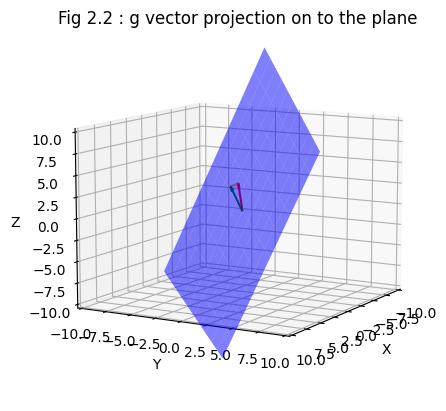

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# define matrix A
A = np.array([[3, 1, 1], [6, 2, 2], [-9, -3, -3]])

# define arbitrary vector g
g = np.array([-1, -1, 3])

# calculate the projection of g onto A
proj_A = A @ np.linalg.pinv(A.T @ A) @ A.T @ g

# calculate the projection of g onto the orthogonal complement of A
proj_ortho = g - proj_A

# create a meshgrid to plot the plane
xx, yy = np.meshgrid(range(-5, 6), range(-5, 6))
z = (-A[0, 0] * xx - A[1, 0] * yy - A[0, 1] * xx - A[1, 1] * yy) / A[2, 1]

# create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title('Fig 2.2 : g vector projection on to the plane')

# plot the plane
ax.plot_surface(xx, yy, z, color='blue', alpha=0.5)

# plot the arbitrary vector g
ax.quiver(0, 0, 0, g[0], g[1], g[2], color='red', arrow_length_ratio=0.2)

# plot the projection of g onto A
ax.quiver(0, 0, 0, proj_A[0], proj_A[1], proj_A[2], color='green', arrow_length_ratio=0.2)

# plot the projection of g onto the orthogonal complement of A
ax.quiver(proj_A[0], proj_A[1], proj_A[2], proj_ortho[0], proj_ortho[1], proj_ortho[2], color='orange')

# set the limits of the plot
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)

# set the labels of the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(10, 30)

# show the plot
plt.show()


#### Task-2.3

Let $\mathrm{g}^{\|}$be the orthogonal projection of the vector $\mathrm{g}$ onto $V$, and $\mathrm{g}^{\perp}$ be the orthogonal projection of the vector $g$ onto the orthogonal compliment of $V$. With that information, how can we recover g? Prove that your procedure is correct.

### Solution 2.3

Let $g_{\mathrm{ll}}$ be the orthogonal projection of the vector $g$ onto $A$, and let $g_{\mathrm{p}}$ be the orthogonal projection of the vector $g$ onto the orthogonal complement of $A$.

To recover $g$, we can use the fact that $g = g_{\mathrm{ll}} + g_{\mathrm{p}}$.

We have already shown that $g_{\mathrm{ll}}$ and $g_{\mathrm{p}}$ are given by:

$$ g_{\mathrm{ll}} = A(A^TA)^{-1}A^Tg, \qquad g_{\mathrm{p}} = g - g_{\mathrm{ll}} $$

Substituting $g_{\mathrm{ll}}$ into the equation for $g$, we have:

$$g = g_{\mathrm{ll}} + g_{\mathrm{p}} = A(A^TA)^{-1}A^Tg + (g - A(A^TA)^{-1}A^Tg) = (I - A(A^TA)^{-1}A^T)g + A(A^TA)^{-1}A^Tg $$

Since $A(A^TA)^{-1}A^T$ is the projection matrix onto the column space of $A$, and $I - A(A^TA)^{-1}A^T$ is the projection matrix onto the orthogonal complement of the column space of $A$, we can write:

$$g = \operatorname{proj}A(g) + \operatorname{proj}{A^\perp}(g) $$

This shows that our procedure for recovering $g$ from its orthogonal projections onto $A$ and $A^\perp$ is correct.

In [4]:
## Hence proved above